In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /var/folders/6y/hkxs6t0j69gg890r8gtpf6br0000gn/T/matplotlib-_t0vdayu because the default path (/Users/joban/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [3]:
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [4]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [5]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
6873,200826,2011-12,41.0,28.0,25.2,4.1,10.2,0.400,1.3,3.5,...,1.9,2.4,0.776,0.3,2.4,5.7,2.5,0.5,0.0,11.3
8927,201144,2015-16,56.0,28.0,31.4,5.3,12.4,0.422,1.4,3.8,...,3.4,4.1,0.834,0.5,2.5,6.1,1.5,1.2,0.3,15.3
8107,2216,2013-14,79.0,32.0,34.2,7.1,15.2,0.467,0.0,0.3,...,3.2,4.3,0.742,3.4,6.7,2.5,2.3,0.7,0.3,17.4
178,49,1996-97,73.0,26.0,25.8,4.5,7.4,0.604,0.0,0.0,...,1.7,2.7,0.618,1.9,4.7,0.4,1.6,0.6,1.3,10.6
2957,2056,2002-03,22.0,23.0,4.9,0.7,1.7,0.395,0.0,0.0,...,0.5,0.9,0.600,0.6,0.5,0.2,0.3,0.1,0.2,1.9
3913,1890,2004-05,81.0,27.0,38.8,7.6,15.9,0.476,1.4,4.2,...,2.8,3.4,0.833,2.9,8.4,1.9,1.5,2.0,1.5,19.4
425,452,1996-97,78.0,25.0,41.8,8.1,16.0,0.505,0.2,0.7,...,4.6,6.7,0.687,3.4,6.9,2.7,3.1,1.1,1.4,21.0
8766,202355,2015-16,73.0,27.0,29.1,5.7,9.3,0.606,0.0,0.0,...,2.9,4.5,0.650,3.3,8.6,0.4,1.9,0.6,3.7,14.2
8296,200755,2014-15,78.0,31.0,30.9,5.7,12.0,0.477,2.6,5.9,...,2.3,2.6,0.901,0.3,1.9,1.8,1.2,0.5,0.1,16.4
8862,202702,2015-16,67.0,26.0,25.3,5.2,9.3,0.558,0.0,0.0,...,2.0,3.3,0.613,3.5,5.2,1.2,1.4,0.5,0.9,12.5


In [7]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [8]:
# drop rows with all missing vals to clean data

In [9]:
df_cleaned = df.dropna(how="all")

In [10]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [11]:
# drop outliers by dropping 3 sds away on the low end in terms of games played

In [12]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std()*3)

In [13]:
min_gp

-22.712012335693153

In [14]:
# this number is too low, lets look at a graph to find a better min

<AxesSubplot:>

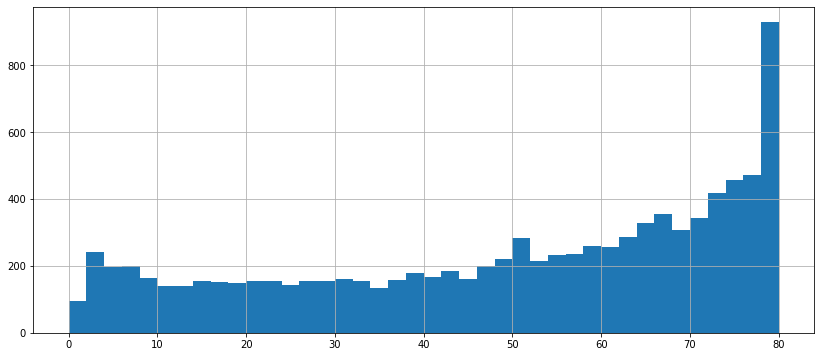

In [15]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])

In [16]:
# 10 seems to be a good number to have as min because after that point data is normal

In [17]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [18]:
# lets check how many players were dropped due to the min gp requirement
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x-y)

971


# Normalize data across all seasons 
# Important to do because due to playstyle, rule changes, player skill, etc stats are impacted by when they occurred

In [19]:
season = (df_filter['season_id'] == '2017-18')

In [20]:
df_2018 = df_filter[season]

In [21]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9843,1627823,2017-18,25.0,22.0,11.1,1.2,3.0,0.387,0.6,2.0,...,0.4,0.5,0.833,0.7,1.4,0.5,0.4,0.2,0.1,3.3
9816,203530,2017-18,55.0,26.0,9.7,1.8,3.5,0.516,0.0,0.1,...,0.5,0.9,0.638,1.1,2.0,0.7,0.6,0.2,0.1,4.1
9741,203476,2017-18,79.0,28.0,16.9,2.4,4.9,0.479,0.2,0.8,...,1.0,1.3,0.775,1.3,3.2,0.9,0.7,0.6,0.5,5.9
9936,201144,2017-18,12.0,30.0,31.1,5.3,14.0,0.381,2.0,6.4,...,4.4,5.5,0.803,0.0,2.3,4.1,1.5,1.0,0.3,17.1
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,6.5,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9
9649,1627745,2017-18,15.0,23.0,5.9,0.7,1.5,0.500,0.0,0.0,...,0.2,0.3,0.600,0.3,0.6,0.1,0.3,0.1,0.2,1.7
10059,202344,2017-18,68.0,30.0,17.0,2.6,5.0,0.516,0.1,0.5,...,1.0,1.4,0.710,1.7,3.0,1.2,0.9,0.4,0.3,6.3
9819,204066,2017-18,24.0,29.0,7.3,0.7,2.5,0.288,0.5,1.5,...,0.4,0.5,0.692,0.3,0.8,0.2,0.3,0.3,0.1,2.3
9580,203459,2017-18,75.0,26.0,29.3,4.5,11.0,0.407,2.7,7.1,...,1.5,1.8,0.852,0.4,3.9,1.6,1.0,0.6,0.5,13.2
9573,202692,2017-18,64.0,26.0,16.5,2.7,6.5,0.411,0.7,2.2,...,1.7,1.9,0.863,0.3,2.7,1.0,0.9,0.6,0.1,7.7


In [22]:
# pts-min divided by max-min gives us a norm value for comparison across seasons
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

/var/folders/6y/hkxs6t0j69gg890r8gtpf6br0000gn/T/ipykernel_8847/2891695788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [23]:
df_2018.sort_values('pts_norm', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [24]:
# create function which takes col to normalize data to make it repeatable
# run function through a for loop going through each col and creating norm values

In [25]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [26]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [27]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [28]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [29]:
df_2018_norm = vorp(df_2018)

/var/folders/6y/hkxs6t0j69gg890r8gtpf6br0000gn/T/ipykernel_8847/2513203259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(col_name)] = normalize(df[col_name])


In [30]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9880,202681,2017-18,60.0,26.0,32.2,8.9,18.1,0.491,2.8,6.8,...,0.666667,0.68,0.448276,0.435644,0.117647,0.280374,0.495146,0.458333,0.46,0.115385
9961,202703,2017-18,55.0,27.0,27.2,5.6,12.4,0.447,2.5,6.5,...,0.595238,0.65,0.229885,0.247525,0.215686,0.570093,0.145631,0.333333,0.22,0.269231
9706,2730,2017-18,81.0,32.0,30.4,6.2,11.2,0.555,0.0,0.1,...,0.000000,0.01,0.471264,0.712871,0.607843,0.850467,0.126214,0.250000,0.52,0.615385
9622,203710,2017-18,38.0,28.0,18.6,2.3,5.2,0.442,0.6,2.1,...,0.142857,0.21,0.034483,0.039604,0.058824,0.093458,0.106796,0.333333,0.10,0.115385
9987,200765,2017-18,65.0,32.0,26.2,3.6,7.6,0.468,0.8,2.3,...,0.190476,0.23,0.045977,0.069307,0.098039,0.317757,0.796117,0.458333,0.46,0.076923
9760,200755,2017-18,70.0,34.0,30.2,5.8,12.6,0.460,2.8,6.6,...,0.666667,0.66,0.321839,0.306931,0.019608,0.205607,0.291262,0.208333,0.30,0.038462
10049,202699,2017-18,80.0,25.0,33.3,7.0,15.3,0.460,2.3,5.6,...,0.547619,0.56,0.252874,0.267327,0.137255,0.420561,0.233010,0.375000,0.26,0.153846
9623,203468,2017-18,81.0,26.0,36.1,8.2,18.6,0.443,2.3,5.9,...,0.547619,0.59,0.298851,0.306931,0.137255,0.289720,0.330097,0.416667,0.38,0.153846
9990,203526,2017-18,41.0,26.0,12.2,1.7,3.7,0.457,0.5,1.1,...,0.119048,0.11,0.068966,0.089109,0.039216,0.074766,0.174757,0.125000,0.18,0.038462
9674,1627761,2017-18,26.0,23.0,17.5,2.0,4.9,0.414,0.4,1.2,...,0.095238,0.12,0.080460,0.128713,0.058824,0.214953,0.184466,0.333333,0.36,0.192308


In [31]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [32]:
# normalize stats across all seasons

In [33]:
df_new = df_filter.groupby(['season_id']).apply(vorp)
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
3620,1032,2004-05,47.0,31.0,5.5,0.4,0.8,0.459,0.0,0.0,...,0.000000,0.000000,0.034483,0.066667,0.102564,0.019231,0.008696,0.034483,0.043478,0.030303
4010,2766,2005-06,57.0,26.0,10.0,0.9,2.5,0.354,0.0,0.1,...,0.000000,0.011905,0.021277,0.034783,0.027027,0.060606,0.123810,0.160000,0.162162,0.000000
6818,2400,2011-12,56.0,30.0,26.2,5.1,11.7,0.437,0.3,1.0,...,0.111111,0.144928,0.449275,0.349057,0.522727,0.365385,0.222222,0.320000,0.461538,0.162162
231,170,1996-97,59.0,35.0,14.9,1.2,2.9,0.406,0.0,0.1,...,0.000000,0.012987,0.078125,0.063830,0.186441,0.220000,0.052632,0.111111,0.159091,0.088235
6062,201188,2009-10,69.0,25.0,35.8,5.5,9.4,0.581,0.0,0.0,...,0.000000,0.000000,0.402174,0.529412,0.731707,0.642105,0.218182,0.434783,0.526316,0.571429
10194,1628464,2018-19,66.0,27.0,13.8,2.2,4.0,0.549,0.4,1.0,...,0.078431,0.075758,0.082474,0.109091,0.240741,0.181818,0.093458,0.136364,0.100000,0.222222
10307,202397,2018-19,56.0,30.0,22.3,3.7,8.7,0.419,0.8,2.4,...,0.156863,0.181818,0.082474,0.100000,0.074074,0.190909,0.336449,0.227273,0.220000,0.074074
234,341,1996-97,56.0,32.0,9.8,0.7,1.6,0.449,0.0,0.1,...,0.000000,0.012987,0.046875,0.031915,0.101695,0.120000,0.035088,0.111111,0.068182,0.058824
9791,101127,2017-18,62.0,34.0,25.0,3.0,7.1,0.427,0.4,1.4,...,0.095238,0.140000,0.114943,0.118812,0.078431,0.233645,0.543689,0.250000,0.380000,0.038462
4536,2443,2006-07,37.0,29.0,18.9,3.2,6.1,0.524,0.0,0.1,...,0.000000,0.012346,0.127907,0.134615,0.272727,0.207921,0.086207,0.238095,0.268293,0.090909


# Player Distance

In [34]:
# Find player distances to find most similar players

In [35]:
def calc_dist(u,v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

In [36]:
# Test func

In [37]:
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [38]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [39]:
df1.sample(5)

,player_id,player_name
482,1627812,Yogi Ferrell
185,203953,Jabari Parker
184,201580,JaVale McGee
446,1627789,Timothe Luwawu-Cabarrot
30,201229,Anthony Tolliver


In [40]:
df2.sample(5)

,player_id,season_id,pts
8930,203488,2015-16,3.3
8550,204028,2014-15,6.0
8171,203912,2014-15,2.0
1714,676,1999-00,3.7
6282,2243,2010-11,1.1


In [41]:
# Merge df1 and df2
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [42]:
df3.sample(5)

,player_id,player_name,season_id,pts
423,1627741,Buddy Hield,2016-17,10.6
1944,2594,Kyle Korver,2012-13,10.9
431,201228,C.J. Watson,2012-13,6.8
1327,2037,Jamal Crawford,2004-05,17.7
399,1627362,Briante Weber,2015-16,4.4


In [43]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [44]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
629,1627745,Damian Jones,2018-19,5.4
2640,202331,Paul George,2018-19,28.0
898,1717,Dirk Nowitzki,2018-19,7.3
2613,201988,Patty Mills,2018-19,9.9
735,202722,Davis Bertans,2018-19,8.0


In [45]:
# comparing specific players to test accuracy
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
stephen_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [46]:
dame_ppg = dame_df.pts.tolist()[0]
stephen_ppg = stephen_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [47]:
calc_dist(dame_ppg, stephen_ppg)

1.5

In [48]:
calc_dist(stephen_ppg, dame_ppg)

1.5

In [49]:
calc_dist(dame_ppg, rudy_ppg)

9.9

# Find Player Function

In [50]:
df_example = df.sample(10)

In [51]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
9708,2548,2017-18,67.0,36.0,22.9,4.5,10.2,0.438,0.5,1.7,...,2.0,2.8,0.714,0.7,3.0,3.4,2.1,0.9,0.7,11.4
8933,203141,2015-16,79.0,30.0,21.3,4.2,9.8,0.427,2.3,5.8,...,1.5,2.0,0.774,0.7,3.1,1.1,1.1,0.4,0.3,12.2
3378,2401,2003-04,39.0,21.0,7.8,1.0,3.1,0.328,0.1,0.3,...,0.6,0.7,0.793,0.6,1.0,0.3,0.4,0.2,0.2,2.7
6664,2209,2010-11,74.0,30.0,15.8,1.9,4.3,0.431,0.9,2.3,...,0.4,0.5,0.882,0.9,2.0,1.1,0.8,0.6,0.6,5.1
5709,2767,2008-09,71.0,27.0,12.1,1.0,2.9,0.332,0.5,1.6,...,0.5,0.6,0.791,0.3,0.8,0.6,0.3,0.5,0.1,3.0
7270,202326,2012-13,75.0,22.0,30.5,6.4,13.8,0.465,0.1,0.3,...,4.2,5.6,0.738,3.0,7.0,2.7,3.0,1.4,0.7,17.1
2446,1563,2001-02,81.0,29.0,21.3,1.7,4.4,0.388,0.0,0.0,...,2.3,2.8,0.824,0.3,2.0,3.6,1.3,0.8,0.0,5.7
8269,203507,2014-15,81.0,20.0,31.4,4.7,9.6,0.491,0.1,0.5,...,3.2,4.3,0.741,1.2,5.5,2.6,2.1,0.9,1.0,12.7
2604,763,2001-02,73.0,34.0,17.1,2.2,4.8,0.456,0.0,0.0,...,1.2,1.6,0.718,1.4,3.1,0.4,0.9,0.4,0.4,5.5
3601,2414,2004-05,67.0,24.0,12.8,1.1,2.6,0.430,0.0,0.0,...,0.8,1.1,0.732,1.3,2.1,0.7,0.8,0.1,0.5,3.0


In [52]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2017-18 2548
2015-16 203141
2003-04 2401
2010-11 2209
2008-09 2767
2012-13 202326
2001-02 1563
2014-15 203507
2001-02 763
2004-05 2414


In [53]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [54]:
# test
find_player(105, '2001-02')

In [55]:
find_player(105, '2022-23')

In [56]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [57]:
df.dtypes

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [58]:
find_player(df, 2544, '2012-13')

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

In [59]:
# Next we calculate player similarity

In [60]:
# test with jrue holiday from 2016-17
current_player_season = '2016-17'
current_player_id = 201950

In [61]:
df_norm

NameError: name 'df_norm' is not defined

In [62]:
df_filter

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7


In [63]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

In [64]:
df_norm

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,0.071429,0.090909,0.156250,0.127660,0.118644,0.160000,0.122807,0.074074,0.181818,0.088235
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,0.000000,0.025974,0.234375,0.255319,0.457627,0.500000,0.070175,0.296296,0.204545,0.058824
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,0.178571,0.155844,0.171875,0.138298,0.084746,0.200000,0.166667,0.333333,0.250000,0.088235
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,0.000000,0.000000,0.156250,0.159574,0.322034,0.230000,0.043860,0.185185,0.227273,0.264706
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,0.000000,0.012987,0.171875,0.191489,0.118644,0.110000,0.035088,0.111111,0.159091,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.156863,0.159091,0.082474,0.081818,0.037037,0.118182,0.177570,0.227273,0.120000,0.037037
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.019608,0.083333,0.051546,0.063636,0.055556,0.154545,0.046729,0.136364,0.080000,0.037037
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,0.098039,0.121212,0.123711,0.145455,0.259259,0.245455,0.084112,0.136364,0.200000,0.333333
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,0.372549,0.386364,0.515464,0.545455,0.111111,0.354545,0.420561,0.454545,0.680000,0.148148


In [65]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
                & (df_norm['season_id'] == current_player_season),
                'pts_norm']).item()

In [66]:
jrue_pts_norm

0.474025974025974

In [67]:
nba_stats = {'first_name': ['Lebron', 'Kyle', 'Lonzo', 'Brandon', 'Josh', 'Lance', 'Michael', 'Tyson', 'Ivica'], 
        'last_name': ['James', 'Kuzma', 'Ball', 'Ingram', 'Hart', 'Stephenson', 'Beasley', 'Chander', 'Zubac'], 
        'ppg': [28.2, 21.1, 14.3, 17.2, 18.2, 11.2, 14.2, 4.5, 6.7], 
        'apg': [12.3, 2.1, 8.9, 2.5, 3.6, 0.2, 1.8, 1.9, 1.5],
        'rpg': [7.1, 5.4, 5.5, 8.1, 3.2, 5.5, 7.7, 2.3, 8.1]}
laker_df = pd.DataFrame(nba_stats, columns = ['first_name', 'last_name', 'ppg', 'apg', 'rpg'])

In [68]:
for row in laker_df.itertuples():
    print(row.first_name, row.last_name, row.ppg)

Lebron James 28.2
Kyle Kuzma 21.1
Lonzo Ball 14.3
Brandon Ingram 17.2
Josh Hart 18.2
Lance Stephenson 11.2
Michael Beasley 14.2
Tyson Chander 4.5
Ivica Zubac 6.7


In [69]:

# read in per game data from csv folder
dataframe = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [70]:
df_example = dataframe.sample(10)

In [71]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2017-18 1626179
1996-97 1110
2018-19 1628413
2017-18 201196
2002-03 2366
2013-14 201627
2002-03 937
2000-01 2072
2011-12 202351
1997-98 143


In [72]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [73]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10039,1626179,2017-18,80.0,24.0,25.9,4.0,10.0,0.395,1.9,5.0,...,1.4,1.9,0.772,0.8,3.9,2.9,1.0,1.0,0.2,11.3
293,1110,1996-97,31.0,26.0,5.2,0.8,1.9,0.417,0.0,0.0,...,0.4,0.7,0.571,0.5,0.7,0.0,0.5,0.1,0.3,2.0
10370,1628413,2018-19,44.0,23.0,14.5,1.8,3.7,0.494,0.8,2.2,...,0.3,0.6,0.481,1.1,2.7,0.9,0.8,0.4,0.9,4.7
9988,201196,2017-18,28.0,32.0,14.0,1.5,4.2,0.359,0.3,0.9,...,1.6,2.0,0.772,0.2,1.1,2.8,1.1,0.5,0.1,4.9
2932,2366,2002-03,46.0,24.0,15.0,1.1,3.2,0.338,0.2,0.8,...,0.8,1.0,0.787,0.4,1.1,2.0,0.6,0.6,0.1,3.2
7659,201627,2013-14,76.0,28.0,18.8,3.1,6.8,0.458,1.2,2.6,...,0.9,1.1,0.828,0.4,1.5,0.8,0.7,0.5,0.2,8.4
2997,937,2002-03,64.0,37.0,29.9,4.1,9.3,0.444,0.6,2.1,...,1.9,2.3,0.818,0.9,3.5,4.5,2.6,1.6,0.4,10.8
2053,2072,2000-01,6.0,21.0,5.8,0.8,3.2,0.263,0.0,0.5,...,0.5,1.0,0.500,0.5,0.2,0.2,0.2,0.2,0.0,2.2
6984,202351,2011-12,26.0,25.0,5.4,0.5,1.5,0.342,0.2,0.5,...,0.3,0.5,0.583,0.1,0.5,0.2,0.3,0.1,0.0,1.4
832,143,1997-98,77.0,26.0,18.3,2.3,5.9,0.399,0.6,1.7,...,1.0,1.3,0.798,0.3,1.1,2.5,1.2,0.7,0.1,6.4


In [75]:
find_player(1110, '1996-97')

Pandas(Index=293, player_id=1110, season_id='1996-97', gp=31.0, age=26.0, min=5.2, fgm=0.8, fga=1.9, fg_pct=0.417, fg3m=0.0, fg3a=0.0, fg3_pct=0.0, ftm=0.4, fta=0.7, ft_pct=0.5710000000000001, oreb=0.5, dreb=0.7, ast=0.0, tov=0.5, stl=0.1, blk=0.3, pts=2.0)

In [76]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

# Player Similarity

In [77]:
current_player_season = '2016-17'
current_player_id = 201950

In [78]:

# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [79]:
# Clean the df
df_cleaned = df.dropna(how='all')

In [80]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [81]:
cols_to_norm = ['pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk']

In [82]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [83]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

In [84]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
             & (df_norm['season_id'] == current_player_season), 
             'pts_norm']).item()

In [85]:
jrue_pts_norm

0.474025974025974

In [86]:
current_player_stats = [
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
]

In [87]:
print(current_player_stats)

[0.474025974025974, 0.8530259365994238, 0.5742574257425742, 0.5387931034482759, 0.3658536585365854, 0.42000000000000004, 0.1956521739130435, 0.2293577981651376, 0.1627906976744186, 0.30693069306930687, 0.6486486486486487, 0.75, 0.49999999999999994, 0.2692307692307692]


In [88]:
current_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == current_player_id) & (df_norm['season_id'] == current_player_season), 'blk_norm']).item()
])

In [89]:
current_player_vector

array([0.47402597, 0.85302594, 0.57425743, 0.5387931 , 0.36585366,
       0.42      , 0.19565217, 0.2293578 , 0.1627907 , 0.30693069,
       0.64864865, 0.75      , 0.5       , 0.26923077])

In [91]:
# Lebron James in the 13-14 season
compared_player_season = '2013-14'
compared_player_id = 203077

In [92]:
compared_player_vector = np.array([
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'pts_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'min_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fgm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fga_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3m_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fg3a_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ftm_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'fta_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'oreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'dreb_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'ast_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'stl_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'tov_norm']).item(),
    (df_norm.loc[(df_norm['player_id'] == compared_player_id) & (df_norm['season_id'] == compared_player_season), 'blk_norm']).item()
])

In [93]:
compared_player_vector

array([0.21766562, 0.59833795, 0.25      , 0.25      , 0.        ,
       0.01265823, 0.20689655, 0.3030303 , 0.33333333, 0.35106383,
       0.07476636, 0.28      , 0.24324324, 0.21428571])

In [95]:
vfunc = np.vectorize(calc_dist)

In [96]:
# Comparing jrue to lebron

In [97]:
distance_vect = vfunc(current_player_vector, compared_player_vector)

In [98]:
distance_vect

array([0.25636036, 0.25468799, 0.32425743, 0.2887931 , 0.36585366,
       0.40734177, 0.01124438, 0.0736725 , 0.17054264, 0.04413314,
       0.57388229, 0.47      , 0.25675676, 0.05494505])

In [99]:
number = np.sum(np.abs(distance_vect)) / len(distance_vect)

In [100]:
number

0.25374793324911765

# Comparing Multiple Players

In [102]:
player_distance = []

In [103]:
df_sample = df_norm.sample(10)

In [104]:
df_sample

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9434,202708,2016-17,13.0,28.0,9.6,1.2,4.0,0.308,0.2,1.0,...,0.048780,0.100000,0.065217,0.073394,0.000000,0.059406,0.090090,0.300000,0.071429,0.000000
9673,202732,2017-18,58.0,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.071429,0.090000,0.000000,0.009901,0.019608,0.093458,0.077670,0.250000,0.060000,0.076923
1203,1727,1998-99,39.0,22.0,13.8,2.2,4.4,0.500,0.2,0.5,...,0.071429,0.070423,0.129870,0.137255,0.125000,0.119565,0.046296,0.074074,0.111111,0.025641
6963,2039,2011-12,46.0,32.0,14.4,1.4,3.5,0.405,0.6,1.8,...,0.222222,0.260870,0.072464,0.066038,0.022727,0.038462,0.094017,0.120000,0.153846,0.000000
7558,200797,2012-13,60.0,28.0,11.1,1.2,1.9,0.614,0.0,0.0,...,0.000000,0.000000,0.127907,0.147059,0.145455,0.127451,0.018018,0.041667,0.179487,0.200000
6269,2757,2010-11,79.0,28.0,34.6,5.2,10.4,0.500,0.8,2.3,...,0.333333,0.365079,0.328947,0.247863,0.111111,0.240385,0.429825,0.500000,0.461538,0.038462
767,461,1997-98,14.0,28.0,25.4,3.7,9.1,0.409,0.1,0.2,...,0.043478,0.033898,0.128205,0.122807,0.529412,0.371134,0.123810,0.269231,0.285714,0.054054
7594,2754,2012-13,79.0,31.0,26.7,3.6,8.1,0.445,0.0,0.3,...,0.000000,0.038961,0.197674,0.235294,0.272727,0.284314,0.108108,0.625000,0.307692,0.200000
313,42,1996-97,65.0,25.0,21.6,3.6,7.1,0.509,0.0,0.0,...,0.000000,0.000000,0.281250,0.308511,0.254237,0.150000,0.122807,0.296296,0.409091,0.235294
9425,201587,2016-17,77.0,28.0,34.0,5.1,12.7,0.403,1.8,5.3,...,0.439024,0.530000,0.347826,0.339450,0.139535,0.534653,0.522523,0.550000,0.428571,0.153846


In [106]:
for row in df_sample.itertuples():
    compared_player_vector = np.array([
    row.pts_norm,
    row.min_norm,
    row.fgm_norm,
    row.fga_norm,
    row.fg3m_norm,
    row.fg3a_norm,
    row.ftm_norm,
    row.fta_norm,
    row.oreb_norm,
    row.dreb_norm,
    row.ast_norm,
    row.stl_norm,
    row.tov_norm,
    row.blk_norm
    ])

    vfunc = np.vectorize(calc_dist)
    distance_vect = vfunc(current_player_vector, compared_player_vector)
    number = np.sum(np.abs(distance_vect)) / len(distance_vect)
    player_distance.append(number)
    player = row.player_id
    print('Done with ' + str(player) + '. Percent error was ' + str(number))

Done with 202708. Percent error was 0.3553443036465324
Done with 202732. Percent error was 0.3634584421746245
Done with 1727. Percent error was 0.32308773069645363
Done with 2039. Percent error was 0.3248411308571555
Done with 200797. Percent error was 0.3412238104962432
Done with 2757. Percent error was 0.08463606320009257
Done with 461. Percent error was 0.25724680670388356
Done with 2754. Percent error was 0.18416815411044046
Done with 42. Percent error was 0.24220155878352517
Done with 201587. Percent error was 0.0979663931130144


In [107]:
player_distance

[0.3553443036465324,
 0.3634584421746245,
 0.32308773069645363,
 0.3248411308571555,
 0.3412238104962432,
 0.08463606320009257,
 0.25724680670388356,
 0.18416815411044046,
 0.24220155878352517,
 0.0979663931130144]

In [108]:
df_sample['distance'] = player_distance

In [109]:
# Sort players by player distance to find most similar

In [110]:
ranked_df = df_sample.sort_values('distance')

In [111]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
6269,2757,2010-11,79.0,28.0,34.6,5.2,10.4,0.500,0.8,2.3,...,0.365079,0.328947,0.247863,0.111111,0.240385,0.429825,0.500000,0.461538,0.038462,0.084636
9425,201587,2016-17,77.0,28.0,34.0,5.1,12.7,0.403,1.8,5.3,...,0.530000,0.347826,0.339450,0.139535,0.534653,0.522523,0.550000,0.428571,0.153846,0.097966
7594,2754,2012-13,79.0,31.0,26.7,3.6,8.1,0.445,0.0,0.3,...,0.038961,0.197674,0.235294,0.272727,0.284314,0.108108,0.625000,0.307692,0.200000,0.184168
313,42,1996-97,65.0,25.0,21.6,3.6,7.1,0.509,0.0,0.0,...,0.000000,0.281250,0.308511,0.254237,0.150000,0.122807,0.296296,0.409091,0.235294,0.242202
767,461,1997-98,14.0,28.0,25.4,3.7,9.1,0.409,0.1,0.2,...,0.033898,0.128205,0.122807,0.529412,0.371134,0.123810,0.269231,0.285714,0.054054,0.257247
1203,1727,1998-99,39.0,22.0,13.8,2.2,4.4,0.500,0.2,0.5,...,0.070423,0.129870,0.137255,0.125000,0.119565,0.046296,0.074074,0.111111,0.025641,0.323088
6963,2039,2011-12,46.0,32.0,14.4,1.4,3.5,0.405,0.6,1.8,...,0.260870,0.072464,0.066038,0.022727,0.038462,0.094017,0.120000,0.153846,0.000000,0.324841
7558,200797,2012-13,60.0,28.0,11.1,1.2,1.9,0.614,0.0,0.0,...,0.000000,0.127907,0.147059,0.145455,0.127451,0.018018,0.041667,0.179487,0.200000,0.341224
9434,202708,2016-17,13.0,28.0,9.6,1.2,4.0,0.308,0.2,1.0,...,0.100000,0.065217,0.073394,0.000000,0.059406,0.090090,0.300000,0.071429,0.000000,0.355344
9673,202732,2017-18,58.0,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.090000,0.000000,0.009901,0.019608,0.093458,0.077670,0.250000,0.060000,0.076923,0.363458


In [112]:
df1 = pd.read_csv('../nba-stats-csv/player_info.csv')

In [113]:
df_final = pd.merge(ranked_df, df1, on=['player_id', 'season_id'], how='left').drop_duplicates()

In [114]:
df_final = df_final[['player_name', 'player_id', 'season_id', 'distance']]

In [115]:
df_final

,player_name,player_id,season_id,distance
0,Beno Udrih,2757,2010-11,0.084636
3,Nicolas Batum,201587,2016-17,0.097966
6,Tony Allen,2754,2012-13,0.184168
9,Monty Williams,42,1996-97,0.242202
12,Popeye Jones,461,1997-98,0.257247
15,Pat Garrity,1727,1998-99,0.323088
18,Keyon Dooling,2039,2011-12,0.324841
21,Ryan Hollins,200797,2012-13,0.341224
24,Norris Cole,202708,2016-17,0.355344
27,DeAndre Liggins,202732,2017-18,0.363458


# Weighting Stat Projections

In [116]:
# Need to apply weight to stats due to varying sample sizes, and previously mentioned differences in seasons

In [117]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19'
]

In [118]:
season_id = '2014-15'
value = season_list.index(season_id)
print(value)

18


In [119]:
current_season = season_list[(season_list.index(season_id))]
print(current_season)

2014-15


In [120]:
next_season = season_list[(season_list.index(season_id) + 1)]
print(next_season)

2015-16


In [121]:
ranked_df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
6269,2757,2010-11,79.0,28.0,34.6,5.2,10.4,0.500,0.8,2.3,...,0.365079,0.328947,0.247863,0.111111,0.240385,0.429825,0.500000,0.461538,0.038462,0.084636
9425,201587,2016-17,77.0,28.0,34.0,5.1,12.7,0.403,1.8,5.3,...,0.530000,0.347826,0.339450,0.139535,0.534653,0.522523,0.550000,0.428571,0.153846,0.097966
7594,2754,2012-13,79.0,31.0,26.7,3.6,8.1,0.445,0.0,0.3,...,0.038961,0.197674,0.235294,0.272727,0.284314,0.108108,0.625000,0.307692,0.200000,0.184168
313,42,1996-97,65.0,25.0,21.6,3.6,7.1,0.509,0.0,0.0,...,0.000000,0.281250,0.308511,0.254237,0.150000,0.122807,0.296296,0.409091,0.235294,0.242202
767,461,1997-98,14.0,28.0,25.4,3.7,9.1,0.409,0.1,0.2,...,0.033898,0.128205,0.122807,0.529412,0.371134,0.123810,0.269231,0.285714,0.054054,0.257247
1203,1727,1998-99,39.0,22.0,13.8,2.2,4.4,0.500,0.2,0.5,...,0.070423,0.129870,0.137255,0.125000,0.119565,0.046296,0.074074,0.111111,0.025641,0.323088
6963,2039,2011-12,46.0,32.0,14.4,1.4,3.5,0.405,0.6,1.8,...,0.260870,0.072464,0.066038,0.022727,0.038462,0.094017,0.120000,0.153846,0.000000,0.324841
7558,200797,2012-13,60.0,28.0,11.1,1.2,1.9,0.614,0.0,0.0,...,0.000000,0.127907,0.147059,0.145455,0.127451,0.018018,0.041667,0.179487,0.200000,0.341224
9434,202708,2016-17,13.0,28.0,9.6,1.2,4.0,0.308,0.2,1.0,...,0.100000,0.065217,0.073394,0.000000,0.059406,0.090090,0.300000,0.071429,0.000000,0.355344
9673,202732,2017-18,58.0,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.090000,0.000000,0.009901,0.019608,0.093458,0.077670,0.250000,0.060000,0.076923,0.363458


In [122]:
print(current_player_id)
print(current_player_season)

201950
2016-17


In [123]:
test_df = ranked_df.iloc[0]

In [124]:
weight = (1 / test_df.distance)
print(weight)

11.815294357865481


In [125]:
stats = ['pts',
         'min',
         'fgm',
         'fga',
         'fg3m',
         'fg3a',
         'ftm',
         'fta',
         'oreb',
         'dreb',
         'ast',
         'stl',
         'tov',
         'blk']

In [126]:
projected_stats = {}

In [127]:
# Loop through stats to fill projected stats for jrue holiday using beno udrih
for col in stats:
    sum_stat = test_df[col] * weight
    projected_stats['porj_' + col] = (sum_stat / weight)

In [128]:
projected_stats

{'porj_pts': 13.7,
 'porj_min': 34.6,
 'porj_fgm': 5.2,
 'porj_fga': 10.4,
 'porj_fg3m': 0.8,
 'porj_fg3a': 2.3,
 'porj_ftm': 2.5,
 'porj_fta': 2.9000000000000004,
 'porj_oreb': 0.5,
 'porj_dreb': 2.8,
 'porj_ast': 4.9,
 'porj_stl': 1.2,
 'porj_tov': 1.8,
 'porj_blk': 0.1}

In [129]:
test_df

player_id        2757
season_id     2010-11
gp               79.0
age              28.0
min              34.6
fgm               5.2
fga              10.4
fg_pct            0.5
fg3m              0.8
fg3a              2.3
fg3_pct         0.357
ftm               2.5
fta               2.9
ft_pct          0.864
oreb              0.5
dreb              2.8
ast               4.9
tov               1.8
stl               1.2
blk               0.1
pts              13.7
pts_norm     0.485294
min_norm     0.845946
fgm_norm     0.531915
fga_norm     0.510101
fg3m_norm    0.333333
fg3a_norm    0.365079
ftm_norm     0.328947
fta_norm     0.247863
oreb_norm    0.111111
dreb_norm    0.240385
ast_norm     0.429825
stl_norm          0.5
tov_norm     0.461538
blk_norm     0.038462
distance     0.084636
Name: 6269, dtype: object

In [130]:
ranked_df

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
6269,2757,2010-11,79.0,28.0,34.6,5.2,10.4,0.500,0.8,2.3,...,0.365079,0.328947,0.247863,0.111111,0.240385,0.429825,0.500000,0.461538,0.038462,0.084636
9425,201587,2016-17,77.0,28.0,34.0,5.1,12.7,0.403,1.8,5.3,...,0.530000,0.347826,0.339450,0.139535,0.534653,0.522523,0.550000,0.428571,0.153846,0.097966
7594,2754,2012-13,79.0,31.0,26.7,3.6,8.1,0.445,0.0,0.3,...,0.038961,0.197674,0.235294,0.272727,0.284314,0.108108,0.625000,0.307692,0.200000,0.184168
313,42,1996-97,65.0,25.0,21.6,3.6,7.1,0.509,0.0,0.0,...,0.000000,0.281250,0.308511,0.254237,0.150000,0.122807,0.296296,0.409091,0.235294,0.242202
767,461,1997-98,14.0,28.0,25.4,3.7,9.1,0.409,0.1,0.2,...,0.033898,0.128205,0.122807,0.529412,0.371134,0.123810,0.269231,0.285714,0.054054,0.257247
1203,1727,1998-99,39.0,22.0,13.8,2.2,4.4,0.500,0.2,0.5,...,0.070423,0.129870,0.137255,0.125000,0.119565,0.046296,0.074074,0.111111,0.025641,0.323088
6963,2039,2011-12,46.0,32.0,14.4,1.4,3.5,0.405,0.6,1.8,...,0.260870,0.072464,0.066038,0.022727,0.038462,0.094017,0.120000,0.153846,0.000000,0.324841
7558,200797,2012-13,60.0,28.0,11.1,1.2,1.9,0.614,0.0,0.0,...,0.000000,0.127907,0.147059,0.145455,0.127451,0.018018,0.041667,0.179487,0.200000,0.341224
9434,202708,2016-17,13.0,28.0,9.6,1.2,4.0,0.308,0.2,1.0,...,0.100000,0.065217,0.073394,0.000000,0.059406,0.090090,0.300000,0.071429,0.000000,0.355344
9673,202732,2017-18,58.0,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.090000,0.000000,0.009901,0.019608,0.093458,0.077670,0.250000,0.060000,0.076923,0.363458


In [131]:
# Use all 10 players in ranked_df to project jrue's stats

In [132]:
projected_stats = {}

In [133]:
sum_stat = 0
sum_weight = 0

In [134]:
for row in ranked_df.itertuples():
    weight = (1 / row.distance)
    sum_stat += row.pts * weight
    sum_weight += weight

In [135]:
proj_points = (sum_stat / sum_weight)

In [136]:
proj_points

9.742892051500657

In [137]:
# Projected stats using all 10 players in ranked_df
for col in stats:
    sum_stat = 0
    sum_weight = 0
    for index, row in ranked_df.iterrows():
        weight = (1 / row.distance)
        sum_stat += row[col] * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

In [138]:
projected_stats

{'player_id': 201950,
 'proj_season_id': '2017-18',
 'proj_pts': 9.742892051500657,
 'proj_min': 25.324703374183848,
 'proj_fgm': 3.634552727387071,
 'proj_fga': 8.124618486624684,
 'proj_fg3m': 0.6396068303035721,
 'proj_fg3a': 1.9159101950436672,
 'proj_ftm': 1.840877795939522,
 'proj_fta': 2.311401130500215,
 'proj_oreb': 0.9066589274151,
 'proj_dreb': 2.8902942181333775,
 'proj_ast': 2.9176355149741493,
 'proj_stl': 0.8925375841425577,
 'proj_tov': 1.455897546766221,
 'proj_blk': 0.30358121592029946}

In [139]:
## Weighted avg using multiple players next season

In [144]:
ranked_df

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm,distance
6269,2757,2010-11,79.0,28.0,34.6,5.2,10.4,0.500,0.8,2.3,...,0.365079,0.328947,0.247863,0.111111,0.240385,0.429825,0.500000,0.461538,0.038462,0.084636
9425,201587,2016-17,77.0,28.0,34.0,5.1,12.7,0.403,1.8,5.3,...,0.530000,0.347826,0.339450,0.139535,0.534653,0.522523,0.550000,0.428571,0.153846,0.097966
7594,2754,2012-13,79.0,31.0,26.7,3.6,8.1,0.445,0.0,0.3,...,0.038961,0.197674,0.235294,0.272727,0.284314,0.108108,0.625000,0.307692,0.200000,0.184168
313,42,1996-97,65.0,25.0,21.6,3.6,7.1,0.509,0.0,0.0,...,0.000000,0.281250,0.308511,0.254237,0.150000,0.122807,0.296296,0.409091,0.235294,0.242202
767,461,1997-98,14.0,28.0,25.4,3.7,9.1,0.409,0.1,0.2,...,0.033898,0.128205,0.122807,0.529412,0.371134,0.123810,0.269231,0.285714,0.054054,0.257247
1203,1727,1998-99,39.0,22.0,13.8,2.2,4.4,0.500,0.2,0.5,...,0.070423,0.129870,0.137255,0.125000,0.119565,0.046296,0.074074,0.111111,0.025641,0.323088
6963,2039,2011-12,46.0,32.0,14.4,1.4,3.5,0.405,0.6,1.8,...,0.260870,0.072464,0.066038,0.022727,0.038462,0.094017,0.120000,0.153846,0.000000,0.324841
7558,200797,2012-13,60.0,28.0,11.1,1.2,1.9,0.614,0.0,0.0,...,0.000000,0.127907,0.147059,0.145455,0.127451,0.018018,0.041667,0.179487,0.200000,0.341224
9434,202708,2016-17,13.0,28.0,9.6,1.2,4.0,0.308,0.2,1.0,...,0.100000,0.065217,0.073394,0.000000,0.059406,0.090090,0.300000,0.071429,0.000000,0.355344
9673,202732,2017-18,58.0,30.0,12.5,0.7,1.8,0.377,0.3,0.9,...,0.090000,0.000000,0.009901,0.019608,0.093458,0.077670,0.250000,0.060000,0.076923,0.363458


In [145]:
pns = find_player(ranked_df, row.player_id, season_list.index(row.season_id))

In [146]:
pns

In [147]:
print(pns)

None


In [148]:
pns = find_player(ranked_df, 2757, '2010-11')

In [149]:
pns

Pandas(Index=6269, player_id=2757, season_id='2010-11', gp=79.0, age=28.0, min=34.6, fgm=5.2, fga=10.4, fg_pct=0.5, fg3m=0.8, fg3a=2.3, fg3_pct=0.357, ftm=2.5, fta=2.9, ft_pct=0.8640000000000001, oreb=0.5, dreb=2.8, ast=4.9, tov=1.8, stl=1.2, blk=0.1, pts=13.7, pts_norm=0.4852941176470588, min_norm=0.845945945945946, fgm_norm=0.5319148936170213, fga_norm=0.51010101010101, fg3m_norm=0.33333333333333337, fg3a_norm=0.36507936507936506, ftm_norm=0.32894736842105265, fta_norm=0.24786324786324787, oreb_norm=0.1111111111111111, dreb_norm=0.24038461538461542, ast_norm=0.4298245614035088, stl_norm=0.5, tov_norm=0.46153846153846156, blk_norm=0.038461538461538464, distance=0.08463606320009257)

In [156]:
for col in stats:
    sum_stat = 0
    sum_weight = 0.000000001 # Was giving error for dividing by zero
    for index, row in ranked_df.iloc[1:11].iterrows():
        if row.season_id == '2017-18':
            continue
        weight = (1 / row.distance)
        next_season = season_list[(season_list.index(row.season_id) + 1)]
        player_next_season = find_player(ranked_df, row.player_id, next_season)
        if player_next_season == None:
            continue
        sum_stat += getattr(player_next_season, col) * weight
        sum_weight += weight
    projected_stats['player_id'] = current_player_id
    projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
    projected_stats['proj_' + col] = (sum_stat / sum_weight)

# Player Comparison Function

In [157]:
# Takes df, current player seasons, current player id

In [158]:
def player_comparison_tool(df, current_player_season, current_player_id):
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    return projected_stats

In [159]:
def player_comparison_tool(df, current_player_season, current_player_id):
    # Check if player season + player id exists in df
    if (((df['season_id'] == current_player_season) & (df['player_id'] == current_player_id)).any() == False):
        print('Can\'t find player with id {} and season {}'.format(current_player_id, current_player_season))
        return
    # Find player
    for row in df.itertuples():
        if current_player_season == row.season_id and current_player_id == row.player_id:
            current_player_id = row.player_id
            break
    # Create player vector for current player to find normalized data
    current_player_vector = np.array([
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'pts_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'min_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fgm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fga_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3m_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fg3a_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ftm_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'fta_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'oreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'dreb_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'ast_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'stl_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'tov_norm']).item(),
        (df.loc[(df['player_id'] == current_player_id) & (df['season_id'] == current_player_season), 'blk_norm']).item()
    ])

    print('Projecting player_id {0} for season {1}'.format(current_player_id, season_list[(season_list.index(row.season_id) + 1)]))
    
    player_distance = []
    
    weighted_numbers = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    
    for row in df.itertuples():
        compared_player_vector = np.array([
        row.pts_norm,
        row.min_norm,
        row.fgm_norm,
        row.fga_norm,
        row.fg3m_norm,
        row.fg3a_norm,
        row.ftm_norm,
        row.fta_norm,
        row.oreb_norm,
        row.dreb_norm,
        row.ast_norm,
        row.stl_norm,
        row.tov_norm,
        row.blk_norm
        ])
        
        vfunc = np.vectorize(calc_distance)
        distance_vect = vfunc(current_player_vector, compared_player_vector)
        weighted_distance = distance_vect * weighted_numbers
        #number = np.sum(np.abs(distance_vect)) / len(distance_vect)
        number = np.sum(np.abs(weighted_distance)) / len(distance_vect)
        player_distance.append(number)
    
    df['distance'] = player_distance
    
    ranked_df = df.sort_values('distance')
    
    stats = ['pts',
             'min',
             'fgm',
             'fga',
             'fg3m',
             'fg3a',
             'ftm',
             'fta',
             'oreb',
             'dreb',
             'ast',
             'stl',
             'tov',
             'blk'
             ]
    
    projected_stats = {}
    
    for col in stats:
        sum_stat = 0
        sum_weight = 0
        for index, row in ranked_df.iloc[1:11].iterrows():
            # skip over the row if it was 2017-18 season because we can't take the next
            if row.season_id == '2017-18':
                continue
            # get the players next season
            weight = (1 / row.distance)
            next_season = season_list[(season_list.index(row.season_id) + 1)]
            # find the player row with the id and the next season
            player_next_season = find_player(ranked_df, row.player_id, next_season)
            # if player_next_season doesn't exist then skip
            if player_next_season == None:
                continue
            sum_stat += getattr(player_next_season, col) * weight
            sum_weight += weight
        projected_stats['player_id'] = current_player_id
        projected_stats['proj_season_id'] = season_list[(season_list.index(current_player_season) + 1)]
        projected_stats['proj_' + col] = (sum_stat / sum_weight)
        
    return projected_stats

# Projecting 2018-19 Stats

In [160]:
df_final

,player_name,player_id,season_id,distance
0,Beno Udrih,2757,2010-11,0.084636
3,Nicolas Batum,201587,2016-17,0.097966
6,Tony Allen,2754,2012-13,0.184168
9,Monty Williams,42,1996-97,0.242202
12,Popeye Jones,461,1997-98,0.257247
15,Pat Garrity,1727,1998-99,0.323088
18,Keyon Dooling,2039,2011-12,0.324841
21,Ryan Hollins,200797,2012-13,0.341224
24,Norris Cole,202708,2016-17,0.355344
27,DeAndre Liggins,202732,2017-18,0.363458


In [161]:
df_norm

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,0.071429,0.090909,0.156250,0.127660,0.118644,0.160000,0.122807,0.074074,0.181818,0.088235
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,0.000000,0.025974,0.234375,0.255319,0.457627,0.500000,0.070175,0.296296,0.204545,0.058824
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,0.178571,0.155844,0.171875,0.138298,0.084746,0.200000,0.166667,0.333333,0.250000,0.088235
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,0.000000,0.000000,0.156250,0.159574,0.322034,0.230000,0.043860,0.185185,0.227273,0.264706
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,0.000000,0.012987,0.171875,0.191489,0.118644,0.110000,0.035088,0.111111,0.159091,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.156863,0.159091,0.082474,0.081818,0.037037,0.118182,0.177570,0.227273,0.120000,0.037037
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.019608,0.083333,0.051546,0.063636,0.055556,0.154545,0.046729,0.136364,0.080000,0.037037
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,0.098039,0.121212,0.123711,0.145455,0.259259,0.245455,0.084112,0.136364,0.200000,0.333333
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,0.372549,0.386364,0.515464,0.545455,0.111111,0.354545,0.420561,0.454545,0.680000,0.148148


In [162]:
df_filter

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7


In [163]:
df_10 = df_filter.sort_values('pts', ascending=False)

In [164]:
df_10

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10328,201935,2018-19,78.0,29.0,36.8,10.8,24.5,0.442,4.8,13.2,...,9.7,11.0,0.879,0.8,5.8,7.5,5.0,2.0,0.7,36.1
4231,977,2005-06,80.0,27.0,41.0,12.2,27.2,0.450,2.3,6.5,...,8.7,10.2,0.850,0.9,4.4,4.5,3.1,1.8,0.4,35.4
3985,947,2005-06,72.0,31.0,43.1,11.3,25.3,0.447,1.0,3.1,...,9.4,11.5,0.814,0.6,2.6,7.4,3.4,1.9,0.1,33.0
3039,1503,2002-03,75.0,24.0,39.3,11.1,24.2,0.457,2.3,6.0,...,7.7,9.7,0.793,1.6,4.9,5.5,2.6,1.7,0.8,32.1
7892,201142,2013-14,81.0,25.0,38.5,10.5,20.8,0.503,2.4,6.1,...,8.7,9.9,0.873,0.7,6.7,5.5,3.5,1.3,0.7,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,203513,2013-14,24.0,23.0,2.6,0.1,0.5,0.231,0.0,0.1,...,0.0,0.0,0.000,0.1,0.3,0.1,0.1,0.0,0.2,0.3
65,279,1996-97,12.0,40.0,8.1,0.2,0.4,0.400,0.0,0.0,...,0.0,0.0,0.000,0.4,0.7,0.3,0.0,0.2,0.3,0.3
3232,93,2003-04,17.0,34.0,4.5,0.1,0.6,0.091,0.0,0.1,...,0.1,0.1,1.000,0.1,0.4,0.2,0.2,0.1,0.0,0.2
7389,2038,2012-13,12.0,33.0,5.7,0.1,0.3,0.250,0.0,0.0,...,0.0,0.2,0.000,0.4,1.3,0.3,0.3,0.1,0.2,0.2


In [166]:
df_10.head(30)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10328,201935,2018-19,78.0,29.0,36.8,10.8,24.5,0.442,4.8,13.2,...,9.7,11.0,0.879,0.8,5.8,7.5,5.0,2.0,0.7,36.1
4231,977,2005-06,80.0,27.0,41.0,12.2,27.2,0.450,2.3,6.5,...,8.7,10.2,0.850,0.9,4.4,4.5,3.1,1.8,0.4,35.4
3985,947,2005-06,72.0,31.0,43.1,11.3,25.3,0.447,1.0,3.1,...,9.4,11.5,0.814,0.6,2.6,7.4,3.4,1.9,0.1,33.0
3039,1503,2002-03,75.0,24.0,39.3,11.1,24.2,0.457,2.3,6.0,...,7.7,9.7,0.793,1.6,4.9,5.5,2.6,1.7,0.8,32.1
7892,201142,2013-14,81.0,25.0,38.5,10.5,20.8,0.503,2.4,6.1,...,8.7,9.9,0.873,0.7,6.7,5.5,3.5,1.3,0.7,32.0
9480,201566,2016-17,81.0,28.0,34.6,10.2,24.0,0.425,2.5,7.2,...,8.8,10.4,0.845,1.7,9.0,10.4,5.4,1.6,0.4,31.6
4682,977,2006-07,77.0,28.0,40.8,10.6,22.8,0.463,1.8,5.2,...,8.7,10.0,0.868,1.0,4.7,5.4,3.3,1.4,0.5,31.6
4241,2544,2005-06,79.0,21.0,42.5,11.1,23.1,0.480,1.6,4.8,...,7.6,10.3,0.738,0.9,6.1,6.6,3.3,1.6,0.8,31.4
2208,947,2001-02,60.0,27.0,43.7,11.1,27.8,0.398,1.3,4.5,...,7.9,9.8,0.812,0.7,3.8,5.5,4.0,2.8,0.2,31.4
1769,947,2000-01,71.0,26.0,41.9,10.7,25.5,0.420,1.4,4.3,...,8.2,10.1,0.814,0.7,3.1,4.6,3.3,2.5,0.3,31.1


In [168]:
ten_players = [201935,
             203081,
             201942,
             201937,
             202339,
             203496,
             203497,
             201567,
             202331,
             202691]

In [169]:
current_player_season = '2017-18'

In [170]:
final_projections = []

In [171]:
# read in per game data from csv folder
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [172]:
df_new = df[df.season_id != '2018-19']

In [173]:
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
8102,203115,2013-14,41.0,23.0,9.4,1.6,3.8,0.417,0.2,0.8,...,0.6,0.8,0.813,0.4,1.4,0.8,0.4,0.2,0.2,4.0
10019,203499,2017-18,54.0,25.0,14.3,1.6,4.1,0.384,0.6,1.6,...,0.6,0.7,0.865,0.3,1.4,1.8,0.6,0.5,0.0,4.3
4091,2205,2005-06,81.0,24.0,18.6,0.9,1.9,0.487,0.0,0.0,...,0.5,0.9,0.542,1.8,2.8,0.3,0.4,0.5,1.8,2.3
8318,203950,2014-15,19.0,21.0,6.6,1.1,1.9,0.568,0.0,0.0,...,0.8,1.5,0.536,0.8,0.9,0.2,0.4,0.3,0.3,3.0
2322,1901,2001-02,55.0,23.0,21.0,3.5,8.3,0.421,0.5,1.7,...,1.4,1.9,0.757,0.7,2.4,1.5,1.4,0.8,0.3,8.9
6111,201629,2009-10,7.0,24.0,4.7,0.6,1.7,0.333,0.0,0.0,...,0.4,0.6,0.750,0.9,0.9,0.0,0.4,0.0,0.1,1.6
5562,101181,2008-09,68.0,27.0,34.3,4.7,9.5,0.497,1.2,3.0,...,2.2,2.3,0.981,0.2,2.6,8.9,2.1,1.1,0.1,12.8
8473,201564,2014-15,71.0,27.0,23.9,4.2,9.9,0.422,1.4,3.9,...,1.6,2.0,0.827,0.4,2.2,2.8,1.8,0.8,0.3,11.4
4838,200780,2006-07,58.0,22.0,11.5,1.1,2.2,0.508,0.0,0.0,...,1.0,1.3,0.787,0.8,1.5,0.2,0.4,0.2,0.7,3.3
2639,980,2001-02,62.0,27.0,21.5,3.9,9.1,0.425,0.0,0.1,...,3.4,4.5,0.754,2.2,3.2,1.1,1.5,0.3,1.4,11.1


In [174]:
df_cleaned = df_new.dropna(how='any')

In [175]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [176]:
df_final = df_filter.groupby(['season_id']).apply(vorp)

In [177]:
df_final.tail(5)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
10098,1628380,2017-18,66.0,20.0,15.8,1.7,4.4,0.398,0.5,1.7,...,0.119048,0.17,0.045977,0.059406,0.137255,0.233645,0.077670,0.125000,0.18,0.192308
10099,203897,2017-18,24.0,23.0,27.3,5.7,14.8,0.383,1.8,5.1,...,0.428571,0.51,0.413793,0.445545,0.078431,0.308411,0.291262,0.416667,0.36,0.076923
10100,2216,2017-18,59.0,36.0,25.6,6.1,12.9,0.473,0.9,2.5,...,0.214286,0.25,0.160920,0.178218,0.313725,0.457944,0.213592,0.291667,0.40,0.076923
10101,2585,2017-18,69.0,34.0,14.1,2.2,3.8,0.564,0.0,0.0,...,0.000000,0.00,0.126437,0.128713,0.254902,0.299065,0.155340,0.250000,0.20,0.076923
10102,1627753,2017-18,18.0,22.0,6.9,0.3,1.8,0.188,0.1,1.1,...,0.023810,0.11,0.045977,0.069307,0.058824,0.065421,0.009709,0.041667,0.12,0.307692


In [178]:
season_list = [
    '1996-97',
    '1997-98',
    '1998-99',
    '1999-00',
    '2000-01',
    '2001-02',
    '2002-03',
    '2003-04',
    '2004-05',
    '2005-06',
    '2006-07',
    '2007-08',
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19']

In [179]:
# function to calculate distance between two points
def calc_distance(u, v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

# function to find the player and the next season
def find_player(df, player_id, season):
    # replaces for loop
    for row in df.itertuples():
        if season == row.season_id and player_id == row.player_id:
            return row

In [180]:
for baller_id in ten_players:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201935 for season 2018-19
Projecting player_id 203081 for season 2018-19
Projecting player_id 201942 for season 2018-19
Projecting player_id 201937 for season 2018-19
Projecting player_id 202339 for season 2018-19
Projecting player_id 203496 for season 2018-19
Projecting player_id 203497 for season 2018-19
Projecting player_id 201567 for season 2018-19
Projecting player_id 202331 for season 2018-19
Projecting player_id 202691 for season 2018-19


In [181]:
final_projections

[{'player_id': 201935,
  'proj_season_id': '2018-19',
  'proj_pts': 27.43275293901888,
  'proj_min': 37.27557007949852,
  'proj_fgm': 8.739531247293517,
  'proj_fga': 19.326112130789124,
  'proj_fg3m': 2.4416014820332617,
  'proj_fg3a': 6.9208700867352,
  'proj_ftm': 7.523821728165839,
  'proj_fta': 8.988620200157476,
  'proj_oreb': 0.8919017968376578,
  'proj_dreb': 5.16723234850663,
  'proj_ast': 6.767128563607211,
  'proj_stl': 1.5624887764528956,
  'proj_tov': 3.839135611297285,
  'proj_blk': 0.545122647769738},
 {'player_id': 203081,
  'proj_season_id': '2018-19',
  'proj_pts': 23.961182438944764,
  'proj_min': 36.33941004840615,
  'proj_fgm': 8.002104609029969,
  'proj_fga': 18.622465082207462,
  'proj_fg3m': 2.1210361807969726,
  'proj_fg3a': 6.107645069732469,
  'proj_ftm': 5.836247539016859,
  'proj_fta': 6.92643264956056,
  'proj_oreb': 0.7750174504531169,
  'proj_dreb': 3.456128912076116,
  'proj_ast': 5.515011529210231,
  'proj_stl': 1.1604155587492513,
  'proj_tov': 2.8427

In [182]:
test_projections = pd.DataFrame(final_projections)

In [183]:
test_projections.sample(5)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk
4,202339,2018-19,15.815523,32.946470,5.598953,12.956197,1.431105,3.886606,3.203014,3.824601,0.557472,3.010688,5.186655,1.367533,2.121440,0.363611
2,201942,2018-19,20.980942,34.625592,7.228287,16.349121,1.107141,3.257628,5.398346,6.510371,0.834226,3.305773,3.592760,1.001176,2.094358,0.252092
0,201935,2018-19,27.432753,37.275570,8.739531,19.326112,2.441601,6.920870,7.523822,8.988620,0.891902,5.167232,6.767129,1.562489,3.839136,0.545123
5,203496,2018-19,9.629862,27.479037,3.555029,8.538201,1.410023,3.997722,1.108837,1.534494,0.832776,3.193731,1.940304,1.269756,1.146877,0.421267
1,203081,2018-19,23.961182,36.339410,8.002105,18.622465,2.121036,6.107645,5.836248,6.926433,0.775017,3.456129,5.515012,1.160416,2.842701,0.407752


In [184]:
df_names = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [185]:
final_stat_df = pd.merge(test_projections, df_names, left_on=['player_id'], right_on=['player_id'], how='inner')

In [186]:
round(final_stat_df,1)

,player_id,proj_season_id,proj_pts,proj_min,proj_fgm,proj_fga,proj_fg3m,proj_fg3a,proj_ftm,proj_fta,proj_oreb,proj_dreb,proj_ast,proj_stl,proj_tov,proj_blk,player_name
0,201935,2018-19,27.4,37.3,8.7,19.3,2.4,6.9,7.5,9.0,0.9,5.2,6.8,1.6,3.8,0.5,James Harden
1,203081,2018-19,24.0,36.3,8.0,18.6,2.1,6.1,5.8,6.9,0.8,3.5,5.5,1.2,2.8,0.4,Damian Lillard
2,201942,2018-19,21.0,34.6,7.2,16.3,1.1,3.3,5.4,6.5,0.8,3.3,3.6,1.0,2.1,0.3,DeMar DeRozan
3,201937,2018-19,12.0,28.7,4.3,9.6,1.2,3.2,2.4,2.8,0.4,2.6,4.9,1.1,2.2,0.2,Ricky Rubio
4,202339,2018-19,15.8,32.9,5.6,13.0,1.4,3.9,3.2,3.8,0.6,3.0,5.2,1.4,2.1,0.4,Eric Bledsoe
5,203496,2018-19,9.6,27.5,3.6,8.5,1.4,4.0,1.1,1.5,0.8,3.2,1.9,1.3,1.1,0.4,Robert Covington
6,203497,2018-19,13.6,33.8,5.1,9.7,0.0,0.0,3.4,5.0,3.0,7.4,1.1,0.6,2.0,2.6,Rudy Gobert
7,201567,2018-19,16.0,31.1,5.5,12.3,1.7,4.4,3.3,4.0,1.8,6.5,1.8,0.8,1.6,0.6,Kevin Love
8,202331,2018-19,18.1,34.6,6.3,15.0,2.4,6.3,3.1,3.9,0.9,3.9,4.3,1.3,2.2,0.4,Paul George
9,202691,2018-19,18.1,32.8,6.6,14.9,2.5,6.1,2.3,2.7,0.5,3.1,2.5,0.9,1.6,0.4,Klay Thompson


In [187]:
player_df = pd.read_csv('../nba-stats-csv/player_info.csv')

In [188]:
player_filter = player_df[player_df['season_id'] == '2017-18']

In [189]:
player_ids_2018 = player_filter['player_id'].tolist()

In [190]:
player_ids_2018

[201166,
 203932,
 1626151,
 1628935,
 1627846,
 203940,
 201143,
 2744,
 202329,
 1626210,
 202692,
 1628409,
 203518,
 1627936,
 203458,
 1627816,
 1628035,
 203459,
 101161,
 203083,
 2738,
 201281,
 203460,
 101106,
 1626150,
 1628510,
 203952,
 1627790,
 1626148,
 203076,
 201229,
 1628469,
 1628499,
 203382,
 201167,
 203085,
 202340,
 1628389,
 203463,
 1628500,
 1627732,
 202687,
 201933,
 1626246,
 201628,
 1626171,
 203992,
 202711,
 203078,
 201148,
 1627742,
 201943,
 203464,
 1627362,
 1627744,
 201572,
 203998,
 1627854,
 1627741,
 203710,
 203468,
 101139,
 1628403,
 1626166,
 1627747,
 2546,
 1626224,
 202718,
 101112,
 1628429,
 1627767,
 1627778,
 1628449,
 1626191,
 101108,
 203991,
 203469,
 202332,
 201147,
 202709,
 201584,
 1626245,
 1626156,
 201571,
 1628391,
 1626177,
 1627745,
 203081,
 2863,
 1627814,
 1628422,
 1627772,
 1628464,
 201568,
 201980,
 201967,
 203957,
 1627863,
 203967,
 203121,
 201589,
 201954,
 1626199,
 1628021,
 204065,
 2561,
 202722,
 1

In [191]:
for baller_id in player_ids_2018:
    current_player_id = baller_id
    current_player_season = '2017-18'
    projections = player_comparison_tool(df_final, current_player_season, current_player_id)
    if (projections == None):
        continue
    final_projections.append(projections)

Projecting player_id 201166 for season 2018-19
Projecting player_id 203932 for season 2018-19
Can't find player with id 1626151 and season 2017-18
Can't find player with id 1628935 and season 2017-18
Projecting player_id 1627846 for season 2018-19
Can't find player with id 203940 and season 2017-18
Projecting player_id 201143 for season 2018-19
Projecting player_id 2744 for season 2018-19
Projecting player_id 202329 for season 2018-19
Can't find player with id 1626210 and season 2017-18
Projecting player_id 202692 for season 2018-19
Projecting player_id 1628409 for season 2018-19
Projecting player_id 203518 for season 2018-19
Projecting player_id 1627936 for season 2018-19
Projecting player_id 203458 for season 2018-19
Projecting player_id 1627816 for season 2018-19
Projecting player_id 1628035 for season 2018-19
Projecting player_id 203459 for season 2018-19
Projecting player_id 101161 for season 2018-19
Projecting player_id 203083 for season 2018-19
Projecting player_id 2738 for seas

Projecting player_id 101123 for season 2018-19
Can't find player with id 1628492 and season 2017-18
Projecting player_id 203507 for season 2018-19
Projecting player_id 203922 for season 2018-19
Projecting player_id 201609 for season 2018-19
Can't find player with id 202330 and season 2017-18
Projecting player_id 203476 for season 2018-19
Projecting player_id 202328 for season 2018-19
Projecting player_id 1627824 for season 2018-19
Projecting player_id 203084 for season 2018-19
Projecting player_id 202355 for season 2018-19
Projecting player_id 1627740 for season 2018-19
Projecting player_id 203546 for season 2018-19
Projecting player_id 101133 for season 2018-19
Projecting player_id 1628387 for season 2018-19
Projecting player_id 202697 for season 2018-19
Projecting player_id 203477 for season 2018-19
Projecting player_id 1628439 for season 2018-19
Projecting player_id 1627819 for season 2018-19
Projecting player_id 202738 for season 2018-19
Projecting player_id 1627785 for season 2018

Can't find player with id 1628493 and season 2017-18
Projecting player_id 1938 for season 2018-19
Can't find player with id 202705 and season 2017-18
Projecting player_id 201188 for season 2018-19
Projecting player_id 101162 for season 2018-19
Projecting player_id 201158 for season 2018-19
Projecting player_id 1627875 for season 2018-19
Projecting player_id 202694 for season 2018-19
Can't find player with id 1627779 and season 2017-18
Projecting player_id 203935 for season 2018-19
Projecting player_id 201596 for season 2018-19
Projecting player_id 1626209 for season 2018-19
Can't find player with id 203900 and season 2017-18
Projecting player_id 1628365 for season 2018-19
Projecting player_id 202693 for season 2018-19
Projecting player_id 1627737 for season 2018-19
Can't find player with id 203104 and season 2017-18
Projecting player_id 201578 for season 2018-19
Can't find player with id 1627850 and season 2017-18
Projecting player_id 101107 for season 2018-19
Projecting player_id 2034

Projecting player_id 2617 for season 2018-19


ZeroDivisionError: division by zero

In [192]:
player_info_columns = [
    'player_name',
    'player_id',
    'proj_season_id'
]

In [195]:
player_info = final_stat_df[player_info_columns]

In [196]:
final_stat_df.to_csv('../nba-stats-csv/player_proj_df.csv', index=False)
player_info.to_csv('../nba-stats-csv/player_info_df.csv', index=False)